# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

---
---

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

---
---

#### The data ask:

**Explore the data obtained to determine which features are most significant in the prediction of a used car's price. The data are split between qualitative and quantitative data and may need to be transformed in order to be utilized in linear models for analysis. After exploring and checking the quality of the data, we may evaluate the models performance and assess whether feature engineering improvements should be made.**

In [522]:
'''
All of the necessary imports for the tasks to follow
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings('ignore')

---
---

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

---
---

#### Inspect the data:

1. Use methods `head()`, `tail()`, and `info()` to inspect the data
- Note the data types
- Note any null values

2. Determine if any qualitative data should be converted into quantitative (or any other strings to ints)
- If there is qualitative data, consider using `.unique()` to see what the range of values are for this feature

3. Note how many records are available

4. Scan for any outliers or features that may be dropped

In [523]:
vehicles = pd.read_csv('./data/vehicles.csv')

In [524]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [525]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [526]:
'''
Check values for different fields by using a simple function that prints result of .unique()
Consider converting to ints or use OneHotEncoder / OrdinalEncoder later on
'''

def returnUniques(field):
    print(f'These are the unique values for the {field.upper()} field: {vehicles[field].unique()}')

returnUniques("condition")
returnUniques("title_status")

returnUniques("type")
returnUniques("drive")
returnUniques("size")
returnUniques("fuel")

These are the unique values for the CONDITION field: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
These are the unique values for the TITLE_STATUS field: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
These are the unique values for the TYPE field: [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
These are the unique values for the DRIVE field: [nan 'rwd' '4wd' 'fwd']
These are the unique values for the SIZE field: [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
These are the unique values for the FUEL field: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']


---
#### Briefly visualize the data and how it is spread

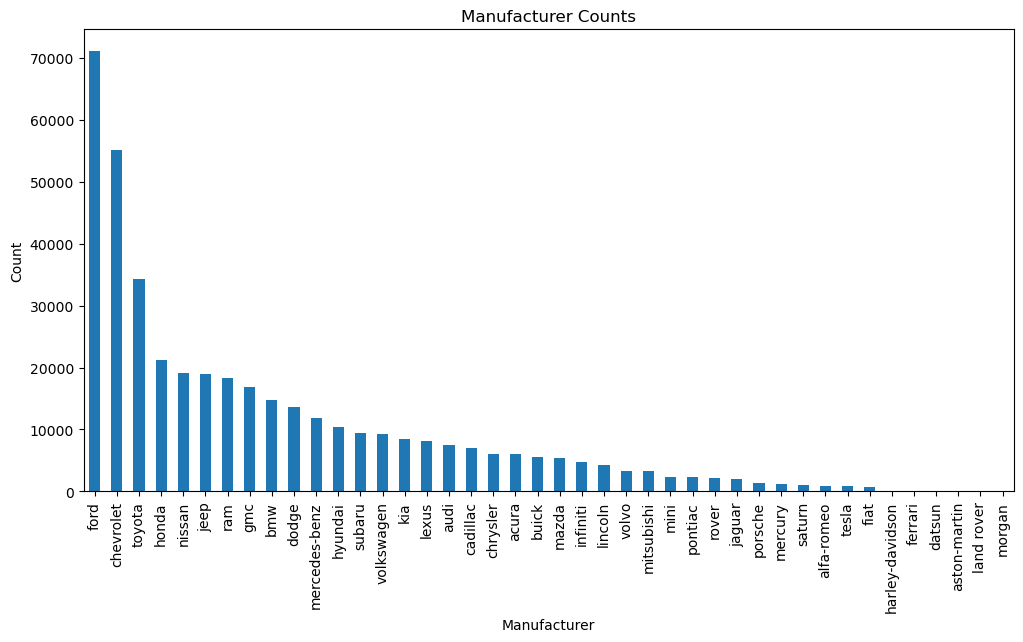

In [527]:
plt.figure(figsize=(12, 6))
vehicles['manufacturer'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Manufacturer Counts')
plt.show()

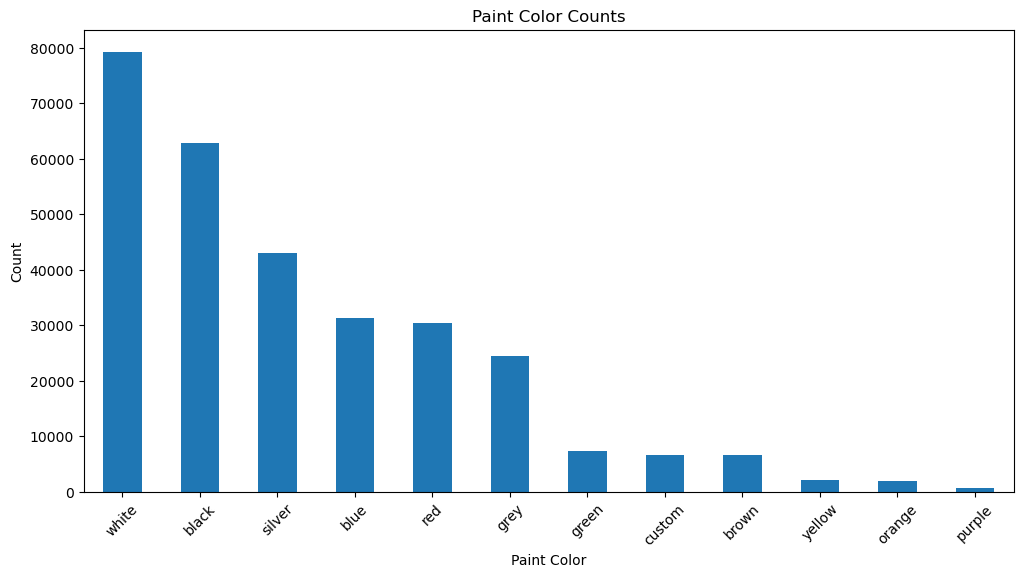

In [528]:
plt.figure(figsize=(12, 6))
vehicles['paint_color'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.title('Paint Color Counts')
plt.show()

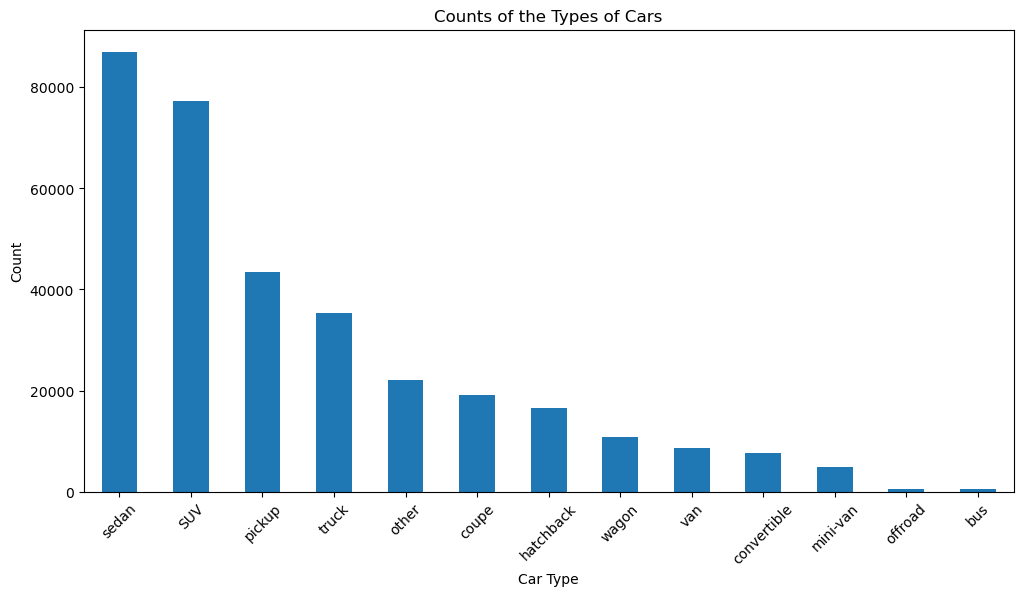

In [529]:
plt.figure(figsize=(12, 6))
vehicles['type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.title('Counts of the Types of Cars')
plt.show()

---

In [531]:
print('Counts of null values:')
vehicles.isnull().sum().sort_values(ascending=False)

Counts of null values:


size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

---
---

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

---
---

#### Inspection summary:

We collected data for 426880 entries. Several fields were recorded as qualitative data which we will need to convert to ints or utilize the OneHotEncoder or OrdinalEncoders in future model creation. There were a significant number of null values as well, with the `size` field containing the most (306,361). We will want to drop some of the null values but we still want to make use of the many records available.

Certain fields including region and state may be dropped, as my goal will be to provide insights that will be applicable to any general used car dealer. Finally, some field data types may be altered to better suit our needs. The `cylinders` field can be converted to an int by removing the unecessary 'cylinders' string.

In [532]:
'''
Create a list of columns to drop from our data--
While size would be a good feature to include, there are many null values and I don't want to make assumptions or
set a default value without more data. We can note that this could be a feature to focus on obtaining data for in the next iteration.
'''

list_to_drop = ['region', 'state', 'id', 'VIN', 'size']
vehicles = vehicles.drop(columns=list_to_drop)

In [533]:
'''
Now that `size` has been removed, we can drop the null values with `.dropna()`
I'll also convert the cylinders values into ints by removing the `cylinders` string text
'''

vehicles['cylinders'] = vehicles['cylinders'].str.extract(r'(\d+)').astype(float)
vehicles = vehicles.dropna()

In [534]:
vehicles.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,black
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,other,4wd,pickup,black
33,34590,2016.0,chevrolet,silverado 1500 double,good,6.0,gas,29499.0,clean,other,4wd,pickup,silver
34,35000,2019.0,toyota,tacoma,excellent,6.0,gas,43000.0,clean,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,colorado extended cab,good,6.0,gas,17302.0,clean,other,4wd,pickup,red


In [535]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115680 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         115680 non-null  int64  
 1   year          115680 non-null  float64
 2   manufacturer  115680 non-null  object 
 3   model         115680 non-null  object 
 4   condition     115680 non-null  object 
 5   cylinders     115680 non-null  float64
 6   fuel          115680 non-null  object 
 7   odometer      115680 non-null  float64
 8   title_status  115680 non-null  object 
 9   transmission  115680 non-null  object 
 10  drive         115680 non-null  object 
 11  type          115680 non-null  object 
 12  paint_color   115680 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 12.4+ MB


In [536]:
'''
Reviewing the dataframe after transforming cylinders and dropping null values, we are left with 115,680 entries.

We notice high MSEs in the models so we decide to come back and test the log price for y_train and y_test for later on when we fit the data.
The log y_train and y_test still return similar MSE values.
'''

X = vehicles.drop('price', axis = 1)
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# y_train_log = np.log1p(y_train)
# y_test_log = np.log1p(y_test)

In [537]:
'''
Before using OneHotEncoder or OrdinalEncoder, let's see what numerical feature is most correlated to price
'''

vehicles_ints = vehicles[['price', 'year', 'cylinders', 'odometer']]
corrs = vehicles_ints.corr()[['price']].nlargest(columns = 'price', n=len(vehicles_ints))
corrs

,price
price,1.000000
cylinders,0.005160
odometer,0.000694
year,-0.001586


In [538]:
'''
Let's set up the column transformer using both Encoders. I'll create new lists of the unique values, 
with the order of the values in mind for the OrdinalEncoder. The order would be best determined following 
guidance from the dealership. For the purposes of this analysis we order the values ourselves.
'''
condition_categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new', ]]
title_status_categories = [['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]

#  OneHotEncoder with all fields
full_transformer = make_column_transformer((PolynomialFeatures(), make_column_selector(dtype_include=np.number)),
                                           (OrdinalEncoder(categories = condition_categories), ['condition']),
                                             (OrdinalEncoder(categories = title_status_categories), ['title_status']),
                                               (OneHotEncoder(drop = 'if_binary', sparse = False), ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color']))

# Updated transformer, drop manufacturer, model, paint_color for faster processing
column_transformer = make_column_transformer((PolynomialFeatures(), make_column_selector(dtype_include=np.number)),
                                           (OrdinalEncoder(categories = condition_categories), ['condition']),
                                             (OrdinalEncoder(categories = title_status_categories), ['title_status']),
                                               (OneHotEncoder(drop = 'if_binary', sparse = False), ['fuel', 'transmission', 'drive', 'type']))

---
---

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

---
---

In [539]:
'''
Review all features here. Let's make a variety of models, and investigate two sets of features. We'll introduce a combination
of the originally int/float data as well as the data to be transformed via the OrdinalEncoder and OneHotEncoder
'''


all_features = list(X_train.columns)
print('All features:')
print(all_features)

print('Ordinals:')
print(['condition', 'title_status'])

print('OneHot:')
print(['fuel', 'transmission', 'drive', 'type'])

All features:
['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
Ordinals:
['condition', 'title_status']
OneHot:
['fuel', 'transmission', 'drive', 'type']


In [540]:
features = ['year', 'condition', 'title_status', 'cylinders', 'odometer', 'type']

column_transformer = make_column_transformer((PolynomialFeatures(), make_column_selector(dtype_include=np.number)),
                                           (OrdinalEncoder(categories = condition_categories), ['condition']),
                                             (OrdinalEncoder(categories = title_status_categories), ['title_status']),
                                               (OneHotEncoder(drop = 'if_binary', sparse = False), ['type']))

features_2 = ['fuel', 'transmission', 'drive', 'year', 'cylinders', 'odometer']

column_transformer_2 = make_column_transformer((PolynomialFeatures(), make_column_selector(dtype_include=np.number)),
                                               (OneHotEncoder(drop = 'if_binary', sparse = False), ['fuel', 'transmission', 'drive']))

#### Sequential Feature Selector

SFS models using the two features we set above.

In [541]:
# Feature set 1
sfs_pipe = Pipeline([
    ('transformer', column_transformer),
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])

params = {'selector__n_features_to_select': [2, 3, 4, 5]}
sfs_grid = GridSearchCV(sfs_pipe, param_grid=params)
sfs_grid.fit(X_train[features], y_train)

sfs_train_preds = sfs_grid.predict(X_train[features])
sfs_test_preds = sfs_grid.predict(X_test[features])

sfs_train_mse = mean_squared_error(y_train, sfs_train_preds)
sfs_test_mse = mean_squared_error(y_test, sfs_test_preds)

print(f'SFS Feature 1 - Train MSE: {sfs_train_mse}')
print(f'SFS Feature 1 - Test MSE: {sfs_test_mse}')

SFS Feature 1 - Train MSE: 601569536703.4005
SFS Feature 1 - Test MSE: 437969641928325.06


In [542]:
# Feature set 2
sfs_pipe_2 = Pipeline([
    ('transformer', column_transformer_2),
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])

params = {'selector__n_features_to_select': [2, 3, 4, 5]}
sfs_grid_2 = GridSearchCV(sfs_pipe_2, param_grid=params)
sfs_grid_2.fit(X_train[features_2], y_train)

sfs_train_preds_2 = sfs_grid_2.predict(X_train[features_2])
sfs_test_preds_2 = sfs_grid_2.predict(X_test[features_2])

sfs_train_mse_2 = mean_squared_error(y_train, sfs_train_preds_2)
sfs_test_mse_2 = mean_squared_error(y_test, sfs_test_preds_2)

print(f'SFS Feature 2 - Train MSE: {sfs_train_mse_2}')
print(f'SFS Feature 2 - Test MSE: {sfs_test_mse_2}')

SFS Feature 2 - Train MSE: 601552502975.882
SFS Feature 2 - Test MSE: 437969159060589.06


#### Ridge
Create Ridge models with alphas of np.logspace(0, 10, 50) for both sets of features

In [543]:
# Feature 1
ridge_params = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_params)
ridge_grid.fit(X_train, y_train)

ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Ridge Feature 1 - Train MSE: {ridge_train_mse}')
print(f'Ridge Feature 1 - Test MSE: {ridge_test_mse}')

Ridge Feature 1 - Train MSE: 601499170120.354
Ridge Feature 1 - Test MSE: 437967171846931.5


In [544]:
# Feature 2
ridge_params = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe_2 = Pipeline([
    ('transformer', column_transformer_2),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_grid_2 = GridSearchCV(ridge_pipe_2, param_grid=ridge_params)
ridge_grid_2.fit(X_train[features_2], y_train)

ridge_train_preds_2 = ridge_grid_2.predict(X_train[features_2])
ridge_test_preds_2 = ridge_grid_2.predict(X_test[features_2])

ridge_train_mse_2 = mean_squared_error(y_train, ridge_train_preds_2)
ridge_test_mse_2 = mean_squared_error(y_test, ridge_test_preds_2)

print(f'Ridge Feature 2 - Train MSE: {ridge_train_mse_2}')
print(f'Ridge Feature 2 - Test MSE: {ridge_test_mse_2}')

Ridge Feature 2 - Train MSE: 601516198898.942
Ridge Feature 2 - Test MSE: 437968125253259.06


#### LASSO

In [545]:
#  Feature 1
lasso_pipe = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state = 42))
])

lasso_pipe.fit(X_train[features], y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

lasso_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train[features]))
lasso_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test[features]))

print(f'LASSO Feature 1 - Train MSE: {lasso_train_mse}')
print(f'LASSO Feature 1 - Test MSE: {lasso_test_mse}')

LASSO Feature 1 - Train MSE: 601452647949.6089
LASSO Feature 1 - Test MSE: 437963951428190.3


In [546]:
#  Feature 2
lasso_pipe_2 = Pipeline([
    ('transformer', column_transformer_2),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state = 42))
])

lasso_pipe_2.fit(X_train[features_2], y_train)
lasso_coefs_2 = lasso_pipe_2.named_steps['lasso'].coef_

lasso_train_mse_2 = mean_squared_error(y_train, lasso_pipe_2.predict(X_train[features_2]))
lasso_test_mse_2 = mean_squared_error(y_test, lasso_pipe_2.predict(X_test[features_2]))

print(f'LASSO Feature 2 - Train MSE: {lasso_train_mse_2}')
print(f'LASSO Feature 2 - Test MSE: {lasso_test_mse_2}')

LASSO Feature 2 - Train MSE: 601487431021.9935
LASSO Feature 2 - Test MSE: 437966865767189.25


---
---

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

---
---

#### Sequential Feature Selector

In [547]:
sfs_best_estimator = sfs_grid.best_estimator_
sfs_best_selector = sfs_best_estimator.named_steps['selector']
sfs_best_model = sfs_grid.best_estimator_.named_steps['model']

sfs_column_transformer_step = sfs_best_estimator.named_steps['transformer']
sfs_X_train_transformed = sfs_column_transformer_step.transform(X_train[features])

sfs_feature_names = sfs_column_transformer_step.get_feature_names_out()
sfs_X_train_transformed_df = pd.DataFrame(sfs_X_train_transformed, columns=sfs_feature_names)

sfs_selected_feature_names = sfs_X_train_transformed_df.columns[sfs_best_selector.get_support()]
print(f"Selected features: {sfs_selected_feature_names}")

sfs_coefs = sfs_best_model.coef_
print(f'Coefficients: {pd.DataFrame([sfs_coefs], columns=sfs_selected_feature_names, index=["model"])}')

Selected features: Index(['polynomialfeatures__year odometer', 'polynomialfeatures__odometer^2',
       'onehotencoder__type_hatchback', 'onehotencoder__type_other',
       'onehotencoder__type_sedan'],
      dtype='object')
Coefficients:        polynomialfeatures__year odometer  polynomialfeatures__odometer^2  \
model                          -0.000012                    2.352889e-09   

       onehotencoder__type_hatchback  onehotencoder__type_other  \
model                  -13750.900519                 3693.10132   

       onehotencoder__type_sedan  
model               -6737.619861  


In [548]:
sfs_best_estimator_2 = sfs_grid_2.best_estimator_
sfs_best_selector_2 = sfs_best_estimator_2.named_steps['selector']
sfs_best_model_2 = sfs_grid_2.best_estimator_.named_steps['model']

sfs_column_transformer_step_2 = sfs_best_estimator_2.named_steps['transformer']
sfs_X_train_transformed_2 = sfs_column_transformer_step_2.transform(X_train[features_2])

sfs_feature_names_2 = sfs_column_transformer_step_2.get_feature_names_out()
sfs_X_train_transformed_df_2 = pd.DataFrame(sfs_X_train_transformed_2, columns=sfs_feature_names_2)

sfs_selected_feature_names_2 = sfs_X_train_transformed_df_2.columns[sfs_best_selector_2.get_support()]
print(f"Selected features: {sfs_selected_feature_names_2}")

sfs_coefs_2 = sfs_best_model_2.coef_
print(f'Coefficients: {pd.DataFrame([sfs_coefs_2], columns=sfs_selected_feature_names_2, index=["model"])}')

Selected features: Index(['polynomialfeatures__odometer', 'polynomialfeatures__year odometer',
       'onehotencoder__fuel_diesel', 'onehotencoder__transmission_other',
       'onehotencoder__drive_fwd'],
      dtype='object')
Coefficients:        polynomialfeatures__odometer  polynomialfeatures__year odometer  \
model                      0.404061                          -0.000205   

       onehotencoder__fuel_diesel  onehotencoder__transmission_other  \
model                  7096.10775                       10680.931727   

       onehotencoder__drive_fwd  
model              -8102.268795  


#### LASSO

In [549]:
lasso_feature_names = lasso_pipe.named_steps['transformer'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': lasso_feature_names, 'coef': lasso_coefs})

lasso_df.loc[lasso_df['coef'] != 0].sort_values(by='coef', ascending=False)

,feature,coef
2,polynomialfeatures__cylinders,19150.648283
3,polynomialfeatures__odometer,5617.237034
8,polynomialfeatures__cylinders odometer,5392.960164
10,ordinalencoder-1__condition,4724.424678
20,onehotencoder__type_pickup,4544.063340
22,onehotencoder__type_truck,3133.809123
9,polynomialfeatures__odometer^2,1865.060617
19,onehotencoder__type_other,1343.060680
11,ordinalencoder-2__title_status,990.814814
4,polynomialfeatures__year^2,180.531731


In [550]:
lasso_feature_names_2 = lasso_pipe_2.named_steps['transformer'].get_feature_names_out()
lasso_df_2 = pd.DataFrame({'feature': lasso_feature_names_2, 'coef': lasso_coefs_2})

lasso_df_2.loc[lasso_df_2['coef'] != 0].sort_values(by='coef', ascending=False)

,feature,coef
2,polynomialfeatures__cylinders,11075.782614
8,polynomialfeatures__cylinders odometer,6074.478652
9,polynomialfeatures__odometer^2,3746.662583
18,onehotencoder__drive_4wd,3097.143337
3,polynomialfeatures__odometer,2374.911606
17,onehotencoder__transmission_other,1879.564464
19,onehotencoder__drive_fwd,1512.899636
10,onehotencoder__fuel_diesel,599.526105
4,polynomialfeatures__year^2,477.868012
11,onehotencoder__fuel_electric,257.324550


In [551]:
'''
Now that we have all the MSEs, let's compare them between the feature lists
'''

feature_1_MSEs = {
    'SFS Train': sfs_train_mse,
    'SFS Test': sfs_test_mse,
    'Ridge Train': ridge_train_mse,
    'Ridge Test': ridge_test_mse,
    'LASSO Train' : lasso_train_mse,
    'LASSO Test' : lasso_test_mse
    
}

feature_1_mse_df = pd.DataFrame(list(feature_1_MSEs.items()), columns=['Model', 'MSE'])
feature_1_mse_df

,Model,MSE
0,SFS Train,6.015695e+11
1,SFS Test,4.379696e+14
2,Ridge Train,6.014992e+11
3,Ridge Test,4.379672e+14
4,LASSO Train,6.014526e+11
5,LASSO Test,4.379640e+14


Our model MSEs seem quite high. Even trying the log transformed price we are seeing large MSEs across all models.
Future improvements to feature selection and how we transform the data may provide better performing models.

Nevertheless, there are some takeaways that we can present while we prepare to repeat the CRISP-DM process.

---
---

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

---
---

#### The Business Ask:
what are the key drivers for used car prices?

#### Our Task:
1. Explore the data and verify quality
2. Make any necessary transformations
3. Build various models
4. Assess model performance and analyze results

#### 1. Explore the data and verify quality

We pull in the data and see we have records for 426880 used cars. After exploring more of this data, it is clear there were many missing values, especially for the field `size`, in which there were 306361 null values. As a result, we decided that field may be dropped for this initial analysis and we would need more values in an updated dataset for it to be more valuable in the estimation of the vehicle's price.

We cleaned the rest of the data by dropping any remaining null values and other columns that would not be relevant to all car salesmen. This left us with 115680 entries of complete data to use in the creation of our models.

#### 2. Make any necessary transformations
In order to build our models, we must convert any qualitative or non-integer values into integers or floats. In some cases we transformed the data by adjusting the values for the field. For example, the number of cylinders on each used car was recorded as a string 'X cylinders' where X is the number of cylinders. Seeing as this is a bit redundant, the column was transformed to hold just the numerical value.

Other fields were adjusted in a similar fashion using the tools OrdinalEncoder and OneHotEncoder.

#### 3. Build various models
We utilized a variety of models and separated these models by two sets of features to investigate. Based on early analysis the number of cylinders was most highly correlated to a car's price. This feature is included in both lists.

Features 1 = ['year', 'condition', 'title_status', 'cylinders', 'odometer', 'type'] \
Features 2 = ['fuel', 'transmission', 'drive', 'year', 'cylinders', 'odometer']

All of our models utilized a 70/30 training/test split of the data. Though all models performed similarly, let's review the results of our LASSO (least absolute shrinkage and selection operator) model. This model had the lowest MSE (mean squared error) of the models we built, indicating a slightly stronger performance for our estimation of car price.

Shown below are the coefficient values from the LASSO models, which describe the features that are important in the estimation of a car's price as well as the direction and magnitude of their relationship to `price`.

In [553]:
print('LASSO Model Coefficients - Feature set 1')
lasso_df.loc[lasso_df['coef'] != 0].sort_values(by='coef', ascending=False)

LASSO Model Coefficients - Feature set 1


,feature,coef
2,polynomialfeatures__cylinders,19150.648283
3,polynomialfeatures__odometer,5617.237034
8,polynomialfeatures__cylinders odometer,5392.960164
10,ordinalencoder-1__condition,4724.424678
20,onehotencoder__type_pickup,4544.063340
22,onehotencoder__type_truck,3133.809123
9,polynomialfeatures__odometer^2,1865.060617
19,onehotencoder__type_other,1343.060680
11,ordinalencoder-2__title_status,990.814814
4,polynomialfeatures__year^2,180.531731


In [554]:
print('LASSO Model Coefficients - Feature set 2')
lasso_df_2.loc[lasso_df_2['coef'] != 0].sort_values(by='coef', ascending=False)

LASSO Model Coefficients - Feature set 2


,feature,coef
2,polynomialfeatures__cylinders,11075.782614
8,polynomialfeatures__cylinders odometer,6074.478652
9,polynomialfeatures__odometer^2,3746.662583
18,onehotencoder__drive_4wd,3097.143337
3,polynomialfeatures__odometer,2374.911606
17,onehotencoder__transmission_other,1879.564464
19,onehotencoder__drive_fwd,1512.899636
10,onehotencoder__fuel_diesel,599.526105
4,polynomialfeatures__year^2,477.868012
11,onehotencoder__fuel_electric,257.324550


Our LASSO model indicates there are many non-zero coefficients. A feature with a coefficient of 0 may be considered not important in our prediction of price. The top features between both are `cylinders`, `odometer`, or some combination of the two. The bottom features are `year odometer` and `cylinders^2`.

From our models, you can assume that the *miles on the odometer* has a strong positive AND negative relationship to price. Besides the miles on the odometer, you should also keep the *number of cylinders* in consideration when reviewing which of your used cars may sell at higher prices. 

#### 4. Assess model performance and analyze results
Let's take a look at the distribution of price based on the number of cylinders and the odometer values:

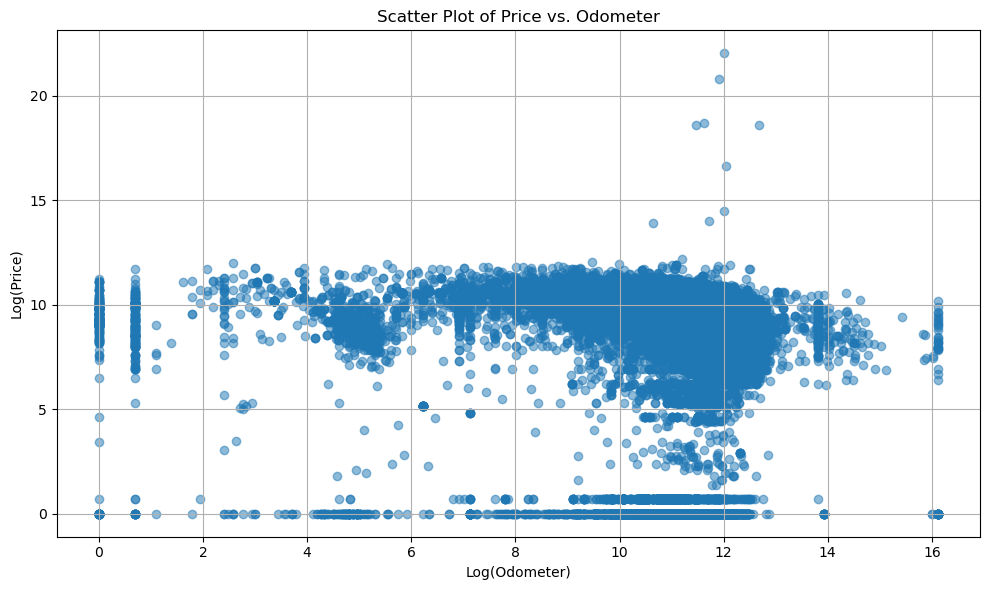

In [567]:
plt.figure(figsize=(10, 6))
plt.scatter(np.log1p(vehicles['odometer']), np.log1p(vehicles['price']), alpha=0.5)
plt.title('Scatter Plot of Price vs. Odometer')
plt.xlabel('Log(Odometer)')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.tight_layout()
plt.show()

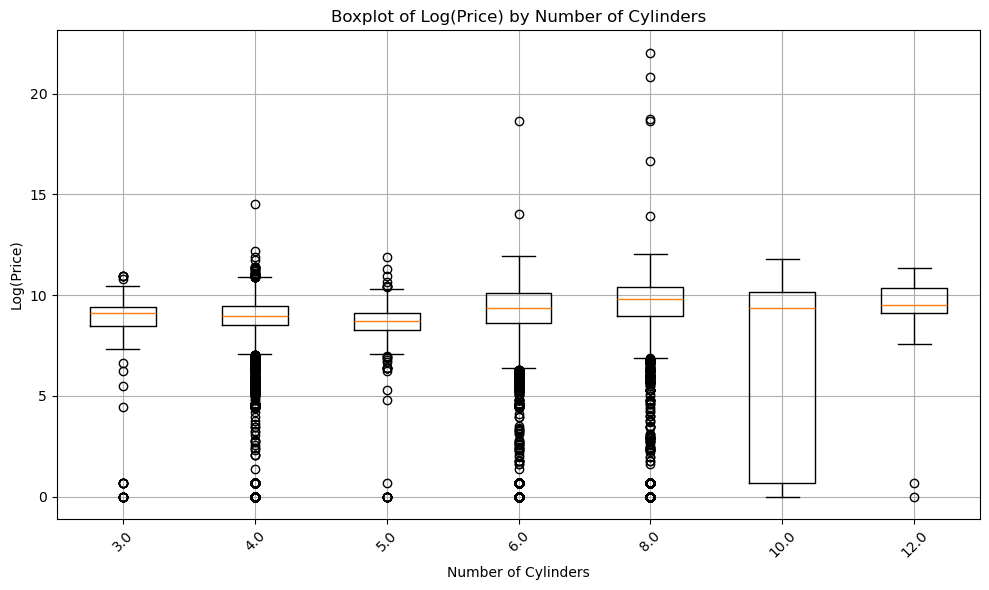

In [572]:
cylinders_data = vehicles.groupby('cylinders')['price'].apply(list).reset_index()
log_price_data = [np.log1p(prices) for prices in cylinders_data['price']]

plt.figure(figsize=(10, 6))
plt.boxplot(log_price_data, labels=cylinders_data['cylinders'])
plt.xlabel('Number of Cylinders')
plt.ylabel('Log(Price)')
plt.title('Boxplot of Log(Price) by Number of Cylinders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Though the LASSO models show strong relationships with these two features, the data still contained some outliers and originally held many null values. The MSEs for each model were quite high between both the training and test sets which suggest we may be able to improve future models by improving our methods of selecting features or transforming the data in new ways. Now that we have a better understanding of the data and a handful of models, we can begin the CRISP-DM process again with these insights to further guide us.